# Data Visualization and Result Analysis for Chapter 3

___
### Tested Models

* EDD Full Packing + CP Scheduling
* EDD Full Packing + EDD Scheduling
* EDD Full Packing + Genetic Algorithm Scheduling
* Clustering Full Packing + CP Scheduling
* Clustering Full Packing + EDD Scheduling
* Clustering Full Packing + Genetic Algorithm Scheduling

### Instance Sizes

* 1000
* 2000
* 3000
* 4000

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pickle

In [57]:
# Load instances
result_data = {}
print('loading...')
for i in [200, 3, 4, 5, 6, 7, 8]:
    temp = {}
    for j in [1000, 2000, 3000, 4000]:
        filepath = f'../archive/chap_3/instances_032120_{i}/jobs_{j}/summary.xlsx'
        if i == 200:
            temp[j] = [pd.read_excel(filepath, 'rsp')]
        else:
            temp[j] = [pd.read_excel(filepath, 'current_exp_pack'),
                       pd.read_excel(filepath, 'current_exp_sched')]
    result_data[i] = temp
    print(f'results loaded for model type {i}')

loading...
results loaded for model type 200
results loaded for model type 3
results loaded for model type 4
results loaded for model type 5
results loaded for model type 6
results loaded for model type 7
results loaded for model type 8


In [58]:
# Continuation of chapter 2 numbins vs tardiness visualization
# Load chapter 2 instances
chap_2_result_data = {}
print('loading...')
for i in [1, 2, 3]:
    temp = {}
    for j in [100, 300, 500]:
        filepath = f'../archive/chap_2/instances_031820_{i}/jobs_{j}/summary.xlsx'
        temp[j] = [pd.read_excel(filepath, 'current_exp_pack'),
                   pd.read_excel(filepath, 'current_exp_sched')]
    chap_2_result_data[i] = temp
    print(f'results loaded for chapter 2 model type {i}')

loading...
results loaded for chapter 2 model type 1
results loaded for chapter 2 model type 2
results loaded for chapter 2 model type 3


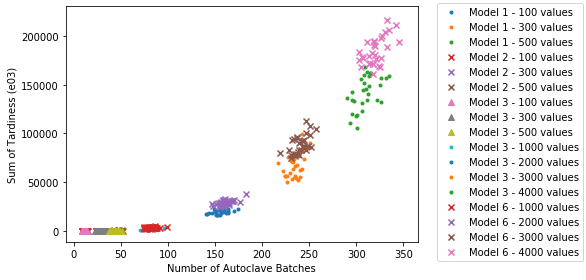

In [59]:
# Plot numbins vs tardiness
fig, ax = plt.subplots()
params = ['.', 'x', '^']
for k, model in enumerate([1, 2, 3]):
    for key in chap_2_result_data[model].keys():
        tardiness = []
        numbins = []
        for i in range(0, 30):
            numbins.append(chap_2_result_data[model][key][0]['numbins'][i])
            tardiness.append(chap_2_result_data[model][key][1]['tardiness'][i])
        ax.scatter(numbins,
                   [tardiness[j] / 1000 for j in range(30)],
                   marker=params[k],
                   label=f'Model {model} - {key} values')
params = ['.','x']
for k, model in enumerate([3, 6]):
    for key in result_data[model].keys():
        tardiness = []
        numbins = []
        for i in range(0, 30):
            numbins.append(result_data[model][key][0]['numbins'][i])
            tardiness.append(result_data[model][key][1]['tardiness'][i])
        ax.scatter(numbins,
                   [tardiness[j] / 1000 for j in range(30)],
                   marker=params[k],
                   label=f'Model {model} - {key} values')
ax.set_xlabel('Number of Autoclave Batches')
ax.set_ylabel('Sum of Tardiness (e03)')
fig.legend(loc='lower left', bbox_to_anchor=(1.0, 0.05))
fig.tight_layout()
plt.show()

Coefficient a: 10359062.031479247
Coefficient b: 1.0090556755521962
Coefficient c: -14491853.070483562
R^2 value: 0.9741676608566764


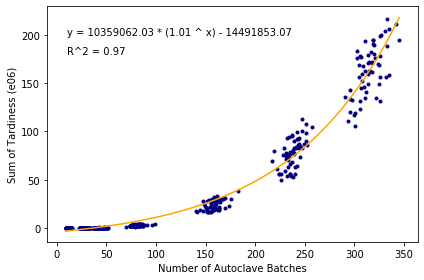

In [84]:
# Fitting an exponential function to the bin vs tardiness graph above
# First define exponential function
def exp(x, a, b, c):
    return a * (b ** x) + c

# Get data points
x_values = []
y_values = []
for k, model in enumerate([1, 2, 3]):
    for key in chap_2_result_data[model].keys():
        for i in range(0, 30):
            x_values.append(chap_2_result_data[model][key][0]['numbins'][i])
            y_values.append(chap_2_result_data[model][key][1]['tardiness'][i])
for k, model in enumerate([3, 6]):
    for key in result_data[model].keys():
        for i in range(0, 30):
            x_values.append(result_data[model][key][0]['numbins'][i])
            y_values.append(result_data[model][key][1]['tardiness'][i])

# Fit curve
np.seterr(all="ignore")
param, _ = curve_fit(exp, x_values, y_values)
SS_res = np.sum([(y_values[i] - exp(x_values[i],
                                    param[0],
                                    param[1],
                                    param[2])) ** 2
                 for i in range(len(x_values))])
SS_tot = np.sum([(y_values[i] - np.mean(y_values)) **  2
                 for i in range(len(y_values))])
R_2 = 1 - (SS_res / SS_tot)

# Print result
print(f'Coefficient a: {param[0]}')
print(f'Coefficient b: {param[1]}')
print(f'Coefficient c: {param[2]}')
print(f'R^2 value: {R_2}')

# Print data with fitted curve
fitted_x = np.linspace(min(x_values), max(x_values))
fitted_y = [param[0] * (param[1] ** fitted_x[i]) + param[2]
            for i in range(len(fitted_x))]
fig, ax = plt.subplots()
ax.plot(fitted_x, [fitted_y[i] / 1000000 for i in range(len(fitted_y))], color='orange')
ax.scatter(x_values, [y_values[i] / 1000000 for i in range(len(y_values))], marker='.', color='navy')
ax.set_xlabel('Number of Autoclave Batches')
ax.set_ylabel('Sum of Tardiness (e06)')
ax.text(10, 200, f'y = {round(param[0], 2)} * ({round(param[1], 2)} ^ x) - {abs(round(param[2], 2))}')
ax.text(10, 180, f'R^2 = {round(R_2, 2)}')
fig.tight_layout()
plt.show()

In [ ]:
# Plot numbins vs tardiness for only model 3

In [ ]:
# Compare job tardiness to RSP distribution

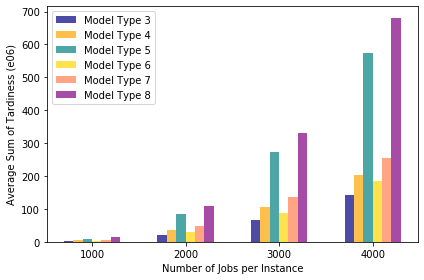

In [85]:
# Compare average tardiness across all models and instance size classes
width = 0.1
x_values = [1, 2, 3, 4]
x_offsets = [-width * 2.5,
             -width * 1.5,
             -width * 0.5,
             width * 0.5,
             width * 1.5,
             width * 2.5]
colors = ['navy', 'orange', 'teal', 'gold', 'coral', 'purple']
fig, ax = plt.subplots()
for k, model in enumerate([3, 4, 5, 6, 7, 8]):
    tardiness = []
    for key in result_data[model].keys():
        tardiness.append(np.mean(result_data[model][key][1]['tardiness']) / 1000000)
    ax.bar([x_values[i] + x_offsets[k] for i in range(4)],
           tardiness, width, label=f'Model Type {model}',
           color=colors[k], alpha=0.7)
ax.set_ylabel('Average Sum of Tardiness (e06)')
ax.set_xlabel('Number of Jobs per Instance')
ax.set_xticks(x_values)
ax.set_xticklabels(['1000', '2000', '3000', '4000'])
ax.legend()
fig.tight_layout()
plt.show()

In [88]:
# Compare percentage of tardy jobs across instance class sizes and models
# Get data
percent_tardy = {}
for model in [3, 4, 5, 6, 7, 8]:
    model_tardy = {}
    for key in result_data[model].keys():
        temp = []
        for instance in range(30):
            filepath = f'../archive/chap_3/instances_032120_{model}/jobs_{key}/instance_{instance}.xlsx'
            df = pd.read_excel(filepath, sheet_name='results', usecols='O')
            zeros = np.sum(df == 0)
            nonzeros = len(df.index) - zeros
            temp.append(nonzeros / len(df.index))
        model_tardy[key] = temp
    percent_tardy[model] = model_tardy
    print(f'Model {model} complete.')

Model 3 complete.
Model 4 complete.
Model 5 complete.
Model 6 complete.
Model 7 complete.
Model 8 complete.


In [104]:
# Save data to file
f = open('../archive/chap_3/pickles/percent_tardy.pkl', 'wb')
pickle.dump(percent_tardy, f)

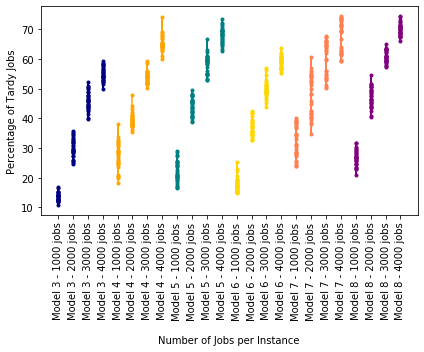

In [144]:
# Plot data
fig, ax = plt.subplots(figsize=(6, 5))
x_values = np.linspace(0, 23, 24)
colors = ['navy', 'orange', 'teal', 'gold', 'coral', 'purple']
i = 0
for k, model in enumerate([3, 4, 5, 6, 7, 8]):
    for key in percent_tardy[model].keys():
        ax.plot([x_values[i]] * len(percent_tardy[model][key]),
                [percent_tardy[model][key][i] * 100 for i in range(30)],
                marker='.',
                color=colors[k],
                label=f'Model {model} - {key} jobs')
        i = i + 1
ax.set_xticks(x_values)
ax.set_xticklabels(['Model 3 - 1000 jobs',
                    'Model 3 - 2000 jobs',
                    'Model 3 - 3000 jobs',
                    'Model 3 - 4000 jobs',
                    'Model 4 - 1000 jobs',
                    'Model 4 - 2000 jobs',
                    'Model 4 - 3000 jobs',
                    'Model 4 - 4000 jobs',
                    'Model 5 - 1000 jobs',
                    'Model 5 - 2000 jobs',
                    'Model 5 - 3000 jobs',
                    'Model 5 - 4000 jobs',
                    'Model 6 - 1000 jobs',
                    'Model 6 - 2000 jobs',
                    'Model 6 - 3000 jobs',
                    'Model 6 - 4000 jobs',
                    'Model 7 - 1000 jobs',
                    'Model 7 - 2000 jobs',
                    'Model 7 - 3000 jobs',
                    'Model 7 - 4000 jobs',
                    'Model 8 - 1000 jobs',
                    'Model 8 - 2000 jobs',
                    'Model 8 - 3000 jobs',
                    'Model 8 - 4000 jobs'], rotation='vertical')
ax.set_xlabel('Number of Jobs per Instance', labelpad=15)
ax.set_ylabel('Percentage of Tardy Jobs')
fig.tight_layout()
plt.show()

In [99]:
# Compare empty capacity in autoclave batches between models
# Get data
mean_jobs_batch = {}
var_jobs_batch = {}
for model in [3, 4, 5, 6, 7, 8]:
    mean = {}
    var = {}
    for key in result_data[model].keys():
        mean_temp = []
        var_temp = []
        for instance in range(30):
            filepath = f'../archive/chap_3/instances_032120_{model}/jobs_{key}/instance_{instance}.xlsx'
            df = pd.read_excel(filepath, sheet_name='results', usecols='AP:AQ')
            df = df.dropna()
            diff = [df['b2_capacity'][i] - df['b2_tools_size'][i] for i in range(len(df))]
            mean_temp.append(np.mean(diff))
            var_temp.append(np.var(diff))
        mean[key] = mean_temp
        var[key] = var_temp
    mean_jobs_batch[model] = mean
    var_jobs_batch[model] = var
    print(f'Model {model} complete.')

Model 3 complete.
Model 4 complete.
Model 5 complete.
Model 6 complete.
Model 7 complete.
Model 8 complete.


In [105]:
# Save data to file
f = open('../archive/chap_3/pickles/mean_jobs_batch.pkl', 'wb')
pickle.dump(mean_jobs_batch, f)
f = open('../archive/chap_3/pickles/var_jobs_batch.pkl', 'wb')
pickle.dump(var_jobs_batch, f)

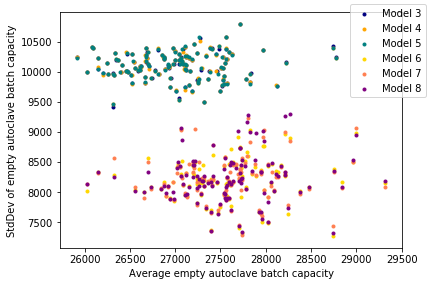

In [139]:
# Plot data
fig, ax = plt.subplots()
colors = ['navy', 'orange', 'teal', 'gold', 'coral', 'purple']
for k, model in enumerate([3, 4, 5, 6, 7, 8]):
    for key in result_data[model].keys():
        if key == 1000:
            ax.scatter(mean_jobs_batch[model][key],
                       [var_jobs_batch[model][key][i] ** 0.5 for i in range(30)],
                       color=colors[k],
                       marker='.',
                       label=f'Model {model}')
        else:
            ax.scatter(mean_jobs_batch[model][key],
                       [var_jobs_batch[model][key][i] ** 0.5 for i in range(30)],
                       marker='.',
                       color=colors[k])
ax.set_xlabel('Average empty autoclave batch capacity')
ax.set_ylabel('StdDev of empty autoclave batch capacity')
fig.legend()
fig.tight_layout()
plt.show()

In [ ]:
# Compare distribution of autoclave batch volumes between techniques

In [106]:
# Compare tardiness mean/variance across instances class sizes and models
# Get data
mean_tardiness = {}
var_tardiness = {}
for model in [3, 4, 5, 6, 7, 8]:
    mean = {}
    var = {}
    for key in result_data[model].keys():
        mean_temp = []
        var_temp = []
        for instance in range(30):
            filepath = f'../archive/chap_3/instances_032120_{model}/jobs_{key}/instance_{instance}.xlsx'
            df = pd.read_excel(filepath, sheet_name='results', usecols='O')
            mean_temp.append(np.mean(df['job_tardiness']))
            var_temp.append(np.var(df['job_tardiness']))
        mean[key] = mean_temp
        var[key] = var_temp
    mean_tardiness[model] = mean
    var_tardiness[model] = var
    print(f'Model {model} complete.')

Model 3 complete.
Model 4 complete.
Model 5 complete.
Model 6 complete.
Model 7 complete.
Model 8 complete.


In [107]:
# Save data to file
f = open('../archive/chap_3/pickles/mean_tardiness.pkl', 'wb')
pickle.dump(mean_tardiness, f)
f = open('../archive/chap_3/pickles/var_tardiness.pkl', 'wb')
pickle.dump(var_tardiness, f)

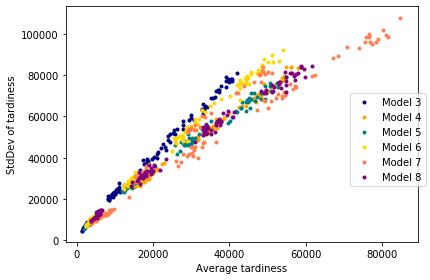

In [143]:
# Plot data
fig, ax = plt.subplots()
colors = ['navy', 'orange', 'teal', 'gold', 'coral', 'purple']
for k, model in enumerate([3, 4, 5, 6, 7, 8]):
    for key in result_data[model].keys():
        if key == 1000:
            ax.scatter(mean_tardiness[model][key],
                       [var_tardiness[model][key][i] ** 0.5 for i in range(30)],
                       color=colors[k],
                       marker='.',
                       label=f'Model {model}')
        else:
            ax.scatter(mean_tardiness[model][key],
                       [var_tardiness[model][key][i] ** 0.5 for i in range(30)],
                       marker='.',
                       color=colors[k])
ax.set_xlabel('Average tardiness')
ax.set_ylabel('StdDev of tardiness')
fig.legend(loc='right')
fig.tight_layout()
plt.show()

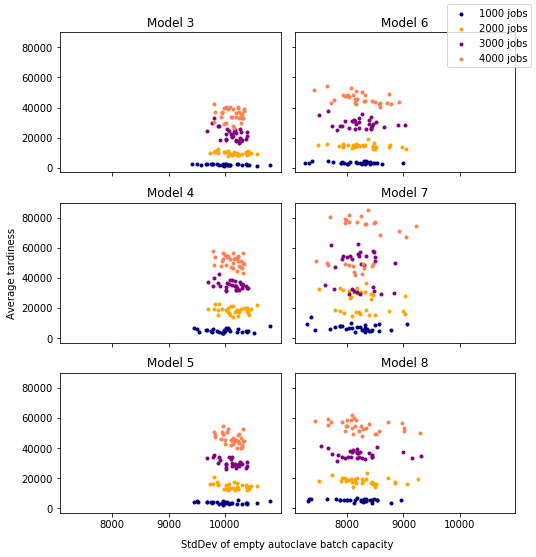

In [169]:
# Compare empty capacity in autoclave batches to resulting tardiness
fig, ax = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(8, 8))
colors = ['navy', 'orange', 'purple', 'coral']
axes = [ax[0][0], ax[1][0], ax[2][0], ax[0][1], ax[1][1], ax[2][1]]
for k, model in enumerate([3, 4, 5, 6, 7, 8]):
    for l, key in enumerate(result_data[model].keys()):
        if model == 3:
            axes[k].scatter([(var_jobs_batch[model][key][i] ** 0.5) for i in range(30)],
                            mean_tardiness[model][key],
                            marker='.',
                            color=colors[l],
                            label=f'{key} jobs')
        else:
            axes[k].scatter([(var_jobs_batch[model][key][i] ** 0.5) for i in range(30)],
                            mean_tardiness[model][key],
                            marker='.',
                            color=colors[l])
        axes[k].set_title(f'Model {model}')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('StdDev of empty autoclave batch capacity', labelpad=10)
plt.ylabel('Average tardiness', labelpad=20)
fig.legend()
fig.tight_layout()
plt.show()